## OR-tools example

This notebook demonstrates how to use `OptiWindNet` to design collector system cable layouts using the **MILPRouter with OR-Tools Solver**.

In [12]:
from optiwindnet.api import WindFarmNetwork, EWRouter, MILPRouter, load_repository

In [13]:
# Display figures as SVG in Jupyter notebooks
%config InlineBackend.figure_formats = ['svg']

### Initialize Moray East

> Note: the `load_repository()` functionality of `OptiWindNet` is used to load a prebuilt *Networkx.Graph* of the avaible locations. For more details on this functionality look into the notebook about [Load repositories containing location data](a03_load_repositories.ipynb).

In [14]:
locations = load_repository()
wfn = WindFarmNetwork(L=locations.morayeast, cables=7)

<Axes: >

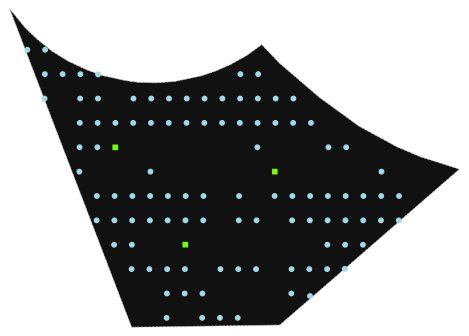

In [15]:
wfn.plot_location()

### Optimize Moray East

Warmstart with `EWRouter`:

In [16]:
res_warmstart= wfn.optimize(router=EWRouter())

In [17]:
wfn.length()

154216.06786855255

In [18]:
router = MILPRouter(solver_name='ortools', time_limit=15, mip_gap=0.01, verbose=True)

>If desired, set the logging level to `INFO` before running `.optimize()` with the `MILPRouter` to display detailed messages about the solver configuration:
>```python
>import logging
>logging.basicConfig(level=logging.INFO)
>```

In [19]:
res = wfn.optimize(router=router)

>>> Using warm start: the model is initialized with the provided solution S <<<

Starting CP-SAT solver v9.14.6206
Parameters: max_time_in_seconds: 15 log_search_progress: true relative_gap_limit: 0.01
Setting number of workers to 8

Initial optimization model '': (model_fingerprint: 0xec05ae126d452a0)
#Variables: 2'440 (#bools: 1'220 in floating point objective) (2'240 primary variables)
  - 1'220 Booleans in [0,1]
  - 920 in [0,6]
  - 300 in [0,7]
#kAtMostOne: 784 (#literals: 2'340)
#kLinear1: 2'440 (#enforced: 2'440)
#kLinearN: 303 (#terms: 6'100)

Starting presolve at 0.01s
The solution hint is complete and is feasible.
[Scaling] Floating point objective has 1220 terms with magnitude in [1119.02, 18596.1] average = 3976.26
[Scaling] Objective coefficient relative error: 2.09617e-10
[Scaling] Objective worst-case absolute error: 7.82463e-05
[Scaling] Objective scaling factor: 2.09715e+06
  2.41e-03s  0.00e+00d  [DetectDominanceRelations] 
  3.78e-02s  0.00e+00d  [operations_research

In [20]:
wfn.G.SolutionInfo

SolutionInfo(runtime=15.0916051, bound=141243.67374315497, objective=144051.56678222827, relgap=0.019492276979660828, termination='FEASIBLE')

In [21]:
wfn.length()

144806.3447688039

<Axes: >

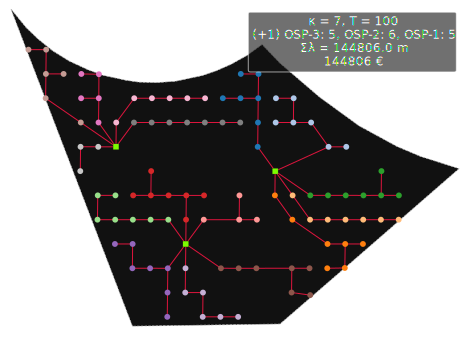

In [22]:
wfn.plot()